In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('amostras_.csv',sep=';')
feature_names = df.drop(columns=['classe']).columns.to_list()
target_names = df.columns[-1:].to_list()

In [3]:
# Configurações para exibição de resultados gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
print("═"*70)
print("ANÁLISE EXPLORATÓRIA AVANÇADA - DATASET IRIS")
print("═"*70)

print("\n📊 1. METADADOS E ESTRUTURA:")
print(f"• Total de amostras: {len(df)}")
print(f"• Número de features: {len(feature_names)}")
print(f"• Features: {', '.join(feature_names)}")
print(f"• Classes: {', '.join(target_names)}")
print("\n🔍 Amostra dos dados:")
print(df.sample(5))

══════════════════════════════════════════════════════════════════════
ANÁLISE EXPLORATÓRIA AVANÇADA - DATASET IRIS
══════════════════════════════════════════════════════════════════════

📊 1. METADADOS E ESTRUTURA:
• Total de amostras: 750
• Número de features: 9
• Features: pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8, pos9
• Classes: classe

🔍 Amostra dos dados:
     pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  \
657     0     1     0    -1     1     1    -1     1    -1   
154     1    -1     1     0     1    -1     1     0    -1   
443     0     1    -1    -1     1    -1     1     0     1   
708     0     1     1     0    -1     1    -1    -1     1   
72      1    -1     1    -1     0    -1     1     0     1   

                           classe  
657                   Fim_de_jogo  
154                   Fim_de_jogo  
443                       Em_jogo  
708                   Fim_de_jogo  
72   Possibilidade_de_fim_de_jogo  



📈 2. BALANCEAMENTO DAS CLASSES:
classe
Em_jogo                        0.330
Possibilidade_de_fim_de_jogo   0.330
Fim_de_jogo                    0.330
Name: proportion, dtype: float64

Teste de Chi-quadrado para balanceamento (p-value = 1.0000)
χ²: 0.0


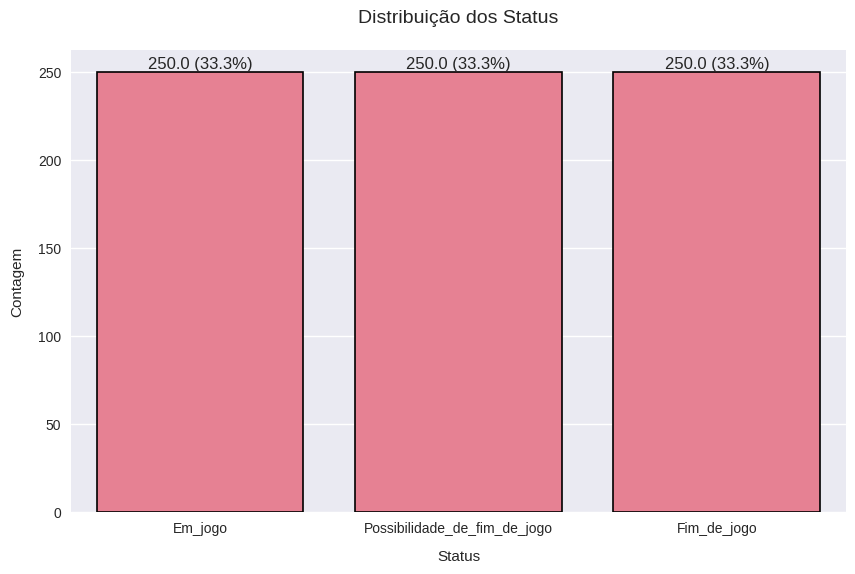

In [5]:
print("\n📈 2. BALANCEAMENTO DAS CLASSES:")
class_dist = df['classe'].value_counts(normalize=True)
print(class_dist.round(2))

# Teste de chi-quadrado para balanceamento
chi2, p = stats.chisquare(df['classe'].value_counts())
print(f"\nTeste de Chi-quadrado para balanceamento (p-value = {p:.4f})")
print(f"χ²: {chi2}")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='classe',
                  edgecolor='black', linewidth=1.2)
plt.title('Distribuição dos Status', pad=20, fontsize=14)
plt.xlabel('Status', labelpad=10)
plt.ylabel('Contagem', labelpad=10)

# Adicionar porcentagens
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
            f'{height} ({height/len(df)*100:.1f}%)',
            ha='center', fontsize=12)
plt.show()